# Figures for paper

- [Importing libraries](#libraries)
- [Plotting conventions](#plotting_conventions)
- [Generating figures from the full simulation](#Full_simulation_figures)<br>
    -[Density of clones in the latent reservoir early in infection](#Full_simulation_density_early_infection)<br>
    -[Decay rates after ART initiation](#decay_rates_after_ART)
- [Generating figures from the constant latent only](#constant_latent_only_figures)<br>
    -[Distribution first year on ART](#constant_latent_only_density_distribution)<br>
    -[Power law figure](#constant_latent_only_powerlaw)
- [Generating figures from the "mutation wave" simulation only](#mutation_wave_only_figures)<br>
- [Generating figures from the "Early ART" simulation only](#early_ART)<br>

    

In [3]:
# Converting uncompressed .csv to compressed .csv.gz

import pandas as pd

base_files = ['clones', 'totals']
extended_files = ['sequences', 'defectives']

file_io = [
    ['OutputFiles/FullSimOrder7', 'data/full', 'extended'],
    ['OutputFiles/EarlyART', 'data/early', 'extended'],
    ['OutputFiles/mutations_wave/Order7', 'data/mutations_wave_7', 'extended'],
    ['OutputFiles/mutations_wave/Order10', 'data/mutations_wave_10', 'extended'],
    ['OutputFiles/constant_latentOnly/Order7', 'data/constant_7', 'base'],
    ['OutputFiles/constant_latentOnly/Order8', 'data/constant_8', 'base'],
    ['OutputFiles/constant_latentOnly/Order9', 'data/constant_9', 'base'],
]

for fio in file_io:
    files = [f for f in base_files]
    if fio[-1]=='extended':
        files += [f for f in extended_files]
    
    for f in files:
        in_file  = os.path.join(fio[0], f+'.csv')
        out_file = os.path.join(fio[1], f+'.csv.gz')
    
        df = pd.read_csv(in_file)
        df.to_csv(out_file, compression='gzip')

<a class="anchor" id="libraries"></a>
## Importing libraries

In [90]:
%matplotlib inline
from copy import deepcopy
from timeit import default_timer as timer
import math
from IPython.display import HTML

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from matplotlib import animation, rc
from matplotlib import cm

from colorsys import hls_to_rgb
from brewer2mpl import sequential

In [91]:
# Importing John's library to make figures
import mplot as mp

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
from importlib import reload
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import mplot as mp

import figures as figs

Figures below were produced using the following packages:
python == 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy == 1.24.3
scipy == 1.10.1
pandas == 2.0.1
matplotlib == 3.7.1
seaborn == 0.12.2


In [2]:
# GLOBAL VARIABLES

DATA_DIR         = os.path.join(os.getcwd(), 'data')
DATA_DIR_FULL    = os.path.join(DATA_DIR, 'full')
DATA_DIR_EARLY   = os.path.join(DATA_DIR, 'early')
DATA_DIR_WAVE_7  = os.path.join(DATA_DIR, 'mutations_wave_7')
DATA_DIR_WAVE_10 = os.path.join(DATA_DIR, 'mutations_wave_10')
DATA_DIR_CONST_7 = os.path.join(DATA_DIR, 'constant_7')
DATA_DIR_CONST_8 = os.path.join(DATA_DIR, 'constant_8')
DATA_DIR_CONST_9 = os.path.join(DATA_DIR, 'constant_9')

<a class="anchor" id="plotting_conventions"></a>
## Plotting conventions

In [92]:
# Plot conventions

cm2inch = lambda x: x/2.54
SINGLE_COLUMN   = cm2inch(8.5)
ONE_FIVE_COLUMN = cm2inch(11.4)
DOUBLE_COLUMN   = cm2inch(17.4)
SLIDE_WIDTH     = 10.5

GOLDR      = (1.0 + np.sqrt(5)) / 2.0
TICKLENGTH = 3
TICKPAD    = 3

# paper style
FONTFAMILY    = 'Arial'
SIZESUBLABEL  = 8
SIZELABEL     = 6
SIZETICK      = 6
SMALLSIZEDOT  = 6.
SIZELINE      = 0.6
AXES_FONTSIZE = 6
AXWIDTH       = 0.4

In [93]:
# GitHub directories
SIM_DIR = 'sims'
FIG_DIR = 'figures'

# Standard color scheme

BKCOLOR    = '#252525'
LCOLOR     = '#969696'
C_BEN      = '#EB4025' #'#F16913'
C_BEN_LT   = '#F08F78' #'#fdd0a2'
C_NEU      =  LCOLOR   #'#E8E8E8' # LCOLOR
C_NEU_LT   = '#E8E8E8' #'#F0F0F0' #'#d9d9d9'
C_DEL      = '#3E8DCF' #'#604A7B'
C_DEL_LT   = '#78B4E7' #'#dadaeb'
C_MPL      = '#FFB511'
C_SL       = C_NEU
PALETTE    = sns.hls_palette(2)  # palette1
MAIN_COLOR = PALETTE[0]
COMP_COLOR = PALETTE[1]
COLOR_1    = '#1295D8'
COLOR_2    = '#FFB511'
VAR_COLORS = sns.husl_palette(8)
C_DELTA    = VAR_COLORS[0]
C_GAMMA    = VAR_COLORS[1]
C_ALPHA    = VAR_COLORS[2]
C_BETA     = VAR_COLORS[3]
C_LAMBDA   = VAR_COLORS[4]
C_EPSILON  = VAR_COLORS[5]
C_D614G    = VAR_COLORS[6]
C_A222V    = VAR_COLORS[7]

In [94]:
# circle plot formatting
S_MULT   = 30*SMALLSIZEDOT #40*SMALLSIZEDOT
S_CUTOFF = 0.0099
DS_NORM  = 0.006
S_CUTOFF = 0.01
DS_NORM  = 0.006


FIGPROPS = {
    'transparent' : True,
    #'bbox_inches' : 'tight'
}

DEF_BARPROPS = {
    'lw'          : SIZELINE/2,
    'width'       : 0.25,
    'edgecolor'   : BKCOLOR,
    'align'       : 'center', #other option: edge
    'orientation' : 'vertical'
}

DEF_HISTPROPS = {
    'histtype'    : 'bar',
    'lw'          : SIZELINE/2,
    'rwidth'      : 0.8,
    'ls'          : 'solid',
    'edgecolor'   : BKCOLOR,
    'alpha'       : 0.5
}

DEF_ERRORPROPS = {
    'mew'        : AXWIDTH,
    'markersize' : SMALLSIZEDOT/2,
    'fmt'        : 'o',
    'elinewidth' : SIZELINE/2,
    'capthick'   : 0,
    'capsize'    : 0
}

DEF_LINEPROPS = {
    'lw' : SIZELINE,
    'ls' : '-'
}

DEF_LABELPROPS = {
    'family' : FONTFAMILY,
    'size'   : SIZELABEL,
    'color'  : BKCOLOR,
    'clip_on': False
}

DEF_SUBLABELPROPS = {
    'family'  : FONTFAMILY,
    'size'    : SIZESUBLABEL+1,
    'weight'  : 'bold',
    'ha'      : 'center',
    'va'      : 'center',
    'color'   : 'k',
    'clip_on' : False
}

DEF_TICKLABELPROPS = {
    'family' : FONTFAMILY,
    'size'   : SIZETICK,
    'color'  : BKCOLOR
}

DEF_TICKPROPS = {
    'length'    : TICKLENGTH,
    'width'     : AXWIDTH/2,
    'pad'       : TICKPAD,
    'axis'      : 'both',
    'direction' : 'out',
    'colors'    : BKCOLOR,
    'bottom'    : True,
    'left'      : True,
    'top'       : False,
    'right'     : False
}

DEF_MINORTICKPROPS = {
    'length'    : TICKLENGTH-1.25,
    'width'     : AXWIDTH/2,
    'axis'      : 'both',
    'direction' : 'out',
    'which'     : 'minor',
    'color'     : BKCOLOR
}

DEF_AXPROPS = {
    'linewidth' : AXWIDTH,
    'linestyle' : '-',
    'color'     : BKCOLOR
}

PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default' : 'regular'}
plt.rcParams.update(PARAMS)

In [ ]:
# section can be deleted

<a class="anchor" id="Full_simulation_figures"></a>
# Generating figures from the full simulation
This section is to generate figures *exclusively* from the full simulation. Comparison between simulation figures, have their own separate section.

In [6]:
df_totals_fullsim     = pd.read_csv('OutputFiles/FullSimOrder7/totals.csv')
df_sequences_fullsim  = pd.read_csv('OutputFiles/FullSimOrder7/sequences.csv')
df_clones_fullsim     = pd.read_csv('OutputFiles/FullSimOrder7/clones.csv')
# df_defectives_fullsim = pd.read_csv('OutputFiles/FullSimOrder7/defectives.csv')

In [8]:
initial_fullsim    = 0
final_fullsim      = 800.0
monthsART_fullsim  = 60
order_fullsim      = 7
idmut_fullsim      = monthsART_fullsim*100
dt_fullsim         = 1.0

t_fullsim          = np.array(df_totals_fullsim['t'])
T_fullsim          = np.array(df_totals_fullsim['T'])
nLclones_fullsim   = np.array(df_totals_fullsim['nLclones'])
nMclones_fullsim   = np.array(df_totals_fullsim['nMclones'])
nDclones_fullsim   = np.array(df_totals_fullsim['nDclones'])
nSequences_fullsim = np.array(df_totals_fullsim['nSequences'])
Ltotal_fullsim     = np.array(df_totals_fullsim['Ltotal'])
Atotal_fullsim     = np.array(df_totals_fullsim['Atotal'])
Vtotal_fullsim     = np.array(df_totals_fullsim['Vtotal'])
LXRtotal_fullsim   = np.array(df_totals_fullsim['LXRtotal'])
Lmut_fullsim       = np.array(df_totals_fullsim['Lmut'])
Amut_fullsim       = np.array(df_totals_fullsim['Amut'])
Vmut_fullsim       = np.array(df_totals_fullsim['Vmut'])
Dtotal_fullsim     = np.array(df_totals_fullsim['Dtotal'])
nL_fullsim         = np.array(df_totals_fullsim['nL'])
nmL_fullsim        = np.array(df_totals_fullsim['nmL'])
nmA_fullsim        = np.array(df_totals_fullsim['nmA'])
nD_fullsim         = np.array(df_totals_fullsim['nD'])
nEvents_fullsim    = np.array(df_totals_fullsim['nEvents'])
ViralLoad_fullsim = (Atotal_fullsim*(10**(11-order_fullsim)))/1680

In [ ]:
# section can be deleted, data will be loaded locally

<a class="anchor" id="Full_simulation_density_early_infection"></a>
## Density of clones in the latent reservoir early in infection

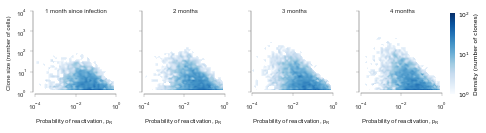

In [168]:
##timepoints
  
timepoints = [1, 2, 3, 4]    
    
# PLOT FIGURE
bmap = sequential.Blues['max']    
## set up figure grid

w     = DOUBLE_COLUMN #SLIDE_WIDTH
goldh = w / 4

fig   = plt.figure(figsize=(w, goldh))

left_bd   = 0.06
right_bd  = 1.05
h_space   = 0.0
box_h     = (right_bd - left_bd - 3*h_space)/4.5
top_bd    = 0.92
bottom_bd = 0.25
v_space   = 0.10
box_v     = (top_bd - bottom_bd - 1*v_space)/2

box_left   = dict(left=left_bd + 0*box_h + 0*h_space, right=left_bd + 1*box_h + 0*h_space, top=top_bd, bottom=bottom_bd)
box_middle = dict(left=left_bd + 1*box_h + 1*h_space, right=left_bd + 2*box_h + 1*h_space, top=top_bd, bottom=bottom_bd)
box_right  = dict(left=left_bd + 2*box_h + 2*h_space, right=left_bd + 3*box_h + 2*h_space, top=top_bd, bottom=bottom_bd)
box_far_right  = dict(left=left_bd + 3*box_h + 3*h_space, right=left_bd + 4*box_h + 3*h_space, top=top_bd, bottom=bottom_bd)


lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

gs_left = gridspec.GridSpec(1, 1, **box_left)
ax_left = plt.subplot(gs_left[0,0])

gs_middle = gridspec.GridSpec(1, 1, **box_middle)
ax_middle = plt.subplot(gs_middle[0,0])

gs_right = gridspec.GridSpec(1, 1, **box_right)
ax_right = plt.subplot(gs_right[0,0])

gs_far_right = gridspec.GridSpec(1, 1, **box_far_right)
ax_far_right = plt.subplot(gs_far_right[0,0])


pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': [r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'],
           'logy':        False,
           'ylabel':      r'Clone size (number of cells)',
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    0.1,
           'theme':       'open' }


ax_used = ax_left

xdat = [np.array([1,2])]
ydat = [np.array([-1,-2])]

mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)


df_clones_temp = df_clones_fullsim[df_clones_fullsim['t']==timepoints[0]]
r = np.array(df_clones_temp['r'])
L = np.array(df_clones_temp['L'])
r = np.delete(r, np.where(L<1))
L = np.delete(L, np.where(L<1))
density = np.zeros((50, 50))
for k in range(len(L)):
    i = -int((np.log10(r[k]))/0.1)  #0.1 is size of step in p_r
    j = int((np.log10(L[k]))/0.1) #0.1 is size of step in clone size
    density[i][j] += 1

rx = np.arange(0.05,5,0.1)
fy = np.arange(0.05,5,0.1)
x = np.zeros(50*50)
y = np.zeros(50*50)
z = np.zeros(50*50)

for i in range(50):
    for j in range(50):
        x[i*50+j] = rx[i]
        y[i*50+j] = fy[j]
        z[i*50+j] = density[i][j]

points = np.column_stack((-x,y))
values = np.log10(z+1)
# values = z
grid_x, grid_y = np.mgrid[-5:0:100j, 0:5:100j]
grid_z = griddata(points, values, (grid_x, grid_y), method='linear')
masked_array = np.ma.array(grid_z.T, mask = grid_z.T==0)

vmax = 2

im = ax_used.imshow(masked_array, cmap=bmap.get_mpl_colormap(), extent=(-5,0,0,5), origin='lower', vmin=0, vmax = vmax)

    
pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': ['', '', '', '', ''],
           'logy':        False,
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    0.0,
           'theme':       'open' }


ax_used = ax_middle


xdat = [np.array([1,2])]
ydat = [np.array([-1,-2])]

mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)


df_clones_temp = df_clones_fullsim[df_clones_fullsim['t']==timepoints[1]]
r = np.array(df_clones_temp['r'])
L = np.array(df_clones_temp['L'])
r = np.delete(r, np.where(L<1))
L = np.delete(L, np.where(L<1))
density = np.zeros((50, 50))
for k in range(len(L)):
    i = -int((np.log10(r[k]))/0.1)  #0.1 is size of step in p_r
    j = int((np.log10(L[k]))/0.1) #0.1 is size of step in clone size
    density[i][j] += 1

rx = np.arange(0.05,5,0.1)
fy = np.arange(0.05,5,0.1)
x = np.zeros(50*50)
y = np.zeros(50*50)
z = np.zeros(50*50)

for i in range(50):
    for j in range(50):
        x[i*50+j] = rx[i]
        y[i*50+j] = fy[j]
        z[i*50+j] = density[i][j]

points = np.column_stack((-x,y))
values = np.log10(z+1)
# values = z
grid_x, grid_y = np.mgrid[-5:0:100j, 0:5:100j]
grid_z = griddata(points, values, (grid_x, grid_y), method='linear')
masked_array = np.ma.array(grid_z.T, mask = grid_z.T==0)


im = ax_used.imshow(masked_array, cmap=bmap.get_mpl_colormap(), extent=(-5,0,0,5), origin='lower', vmin=0, vmax = vmax)



pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': ['', '', '', '', ''],
           'logy':        False,
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    -0.1,
           'theme':       'open' }


ax_used = ax_right

xdat = [np.array([1,2])]
ydat = [np.array([-1,-2])]

mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)


df_clones_temp = df_clones_fullsim[df_clones_fullsim['t']==timepoints[2]]
r = np.array(df_clones_temp['r'])
L = np.array(df_clones_temp['L'])
r = np.delete(r, np.where(L<1))
L = np.delete(L, np.where(L<1))
density = np.zeros((50, 50))
for k in range(len(L)):
    i = -int((np.log10(r[k]))/0.1)  #0.1 is size of step in p_r
    j = int((np.log10(L[k]))/0.1) #0.1 is size of step in clone size
    density[i][j] += 1

rx = np.arange(0.05,5,0.1)
fy = np.arange(0.05,5,0.1)
x = np.zeros(50*50)
y = np.zeros(50*50)
z = np.zeros(50*50)

for i in range(50):
    for j in range(50):
        x[i*50+j] = rx[i]
        y[i*50+j] = fy[j]
        z[i*50+j] = density[i][j]

points = np.column_stack((-x,y))
values = np.log10(z+1)
# values = z
grid_x, grid_y = np.mgrid[-5:0:100j, 0:5:100j]
grid_z = griddata(points, values, (grid_x, grid_y), method='linear')
masked_array = np.ma.array(grid_z.T, mask = grid_z.T==0)


im = ax_used.imshow(masked_array, cmap=bmap.get_mpl_colormap(), extent=(-5,0,0,5), origin='lower', vmin=0, vmax = vmax)


pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': ['', '', '', '', ''],
           'logy':        False,
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    - 0.2,
           'theme':       'open' }

ax_used = ax_far_right


xdat = [np.array([1,2])]
ydat = [np.array([-1,-2])]

mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)


df_clones_temp = df_clones_fullsim[df_clones_fullsim['t']==timepoints[3]]
r = np.array(df_clones_temp['r'])
L = np.array(df_clones_temp['L'])
r = np.delete(r, np.where(L<1))
L = np.delete(L, np.where(L<1))
density = np.zeros((50, 50))
for k in range(len(L)):
    i = -int((np.log10(r[k]))/0.1)  #0.1 is size of step in p_r
    j = int((np.log10(L[k]))/0.1) #0.1 is size of step in clone size
    density[i][j] += 1

rx = np.arange(0.05,5,0.1)
fy = np.arange(0.05,5,0.1)
x = np.zeros(50*50)
y = np.zeros(50*50)
z = np.zeros(50*50)

for i in range(50):
    for j in range(50):
        x[i*50+j] = rx[i]
        y[i*50+j] = fy[j]
        z[i*50+j] = density[i][j]

points = np.column_stack((-x,y))
values = np.log10(z+1)
# values = z
grid_x, grid_y = np.mgrid[-5:0:100j, 0:5:100j]
grid_z = griddata(points, values, (grid_x, grid_y), method='linear')
masked_array = np.ma.array(grid_z.T, mask = grid_z.T==0)


im = ax_used.imshow(masked_array, cmap=bmap.get_mpl_colormap(), extent=(-5,0,0,5), origin='lower', vmin=0, vmax = vmax)


ax_left.text(box_left['left']+0.05, box_left['top']-0.01, '1 month since infection', transform=fig.transFigure, **DEF_LABELPROPS) 
ax_middle.text(box_middle['left']+0.09, box_middle['top']-0.01, str(timepoints[1])+' months', transform=fig.transFigure, **DEF_LABELPROPS)
ax_right.text(box_right['left']+0.09, box_left['top']-0.01, str(timepoints[2])+' months', transform=fig.transFigure, **DEF_LABELPROPS)
ax_far_right.text(box_far_right['left']+0.09, box_left['top']-0.01, str(timepoints[3])+' months', transform=fig.transFigure, **DEF_LABELPROPS)


cbar_ax = fig.add_axes([0.93,0.25,0.01,0.65])

ticks_order = [0,1,2]

cbar = fig.colorbar(im, cax=cbar_ax, ticks=ticks_order)  
cbar.ax.set_yticklabels([r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
cbar.ax.tick_params(labelsize=SIZETICK,size=0)
cbar.set_label(label='Density (number of clones)', size=SIZELABEL)
cbar.outline.set_visible(False)



# box_top  = dict(left=left_bd, right=left_bd + 4*box_h + 4*h_space, top=top_bd + 0.09, bottom=top_bd+0.04)
# gs_top = gridspec.GridSpec(1, 1, **box_top)
# ax_top = plt.subplot(gs_top[0,0])

# ax_top.arrow(0,1,1,0, head_width=0.004, head_length =0.05,color='k')
# ax_top.axis('off')

# ax_top.text(0.4,1.002,'Time since infection')

# SAVE FIGURE

plt.savefig('Figures/fullSim_order7_firstmonths_density_active.pdf' , dpi = 1000, facecolor = fig.get_facecolor(), edgecolor=None, **FIGPROPS)


In [11]:
reload(figs)

# Pass early clone information to figure generator

pdata = {
    'clone_file': os.path.join(DATA_DIR_FULL, 'clones.csv.gz'), # clone sizes
    'fig_title':  'fig-2-clone-sizes',                          # figure title
}

figs.plot_lr_distribution_early(**pdata)

<a class="anchor" id="decay_rates_after_ART"></a>
## Decay rates after ART initiation

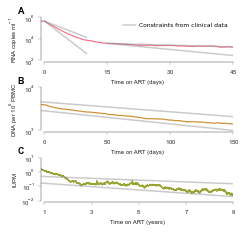

In [259]:
# set up figure grid
    
w     = SINGLE_COLUMN #SLIDE_WIDTH
goldh = w / 1.1
fig   = plt.figure(figsize=(w, goldh))


box_h   = 0.2
box_dh  = 0.12
box_top = 0.95

box_left = dict(left=0.15, right=0.95, top=box_top - 0*box_h - 0*box_dh, bottom=box_top - 1*box_h - 0*box_dh)
box_middle  = dict(left=0.15, right=0.95, top=box_top - 1*box_h - 1*box_dh, bottom=box_top - 2*box_h - 1*box_dh)
box_right = dict(left=0.15, right=0.95, top=box_top - 2*box_h - 2*box_dh, bottom=box_top - 3*box_h - 2*box_dh)

#virion plot

lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

gs_left = gridspec.GridSpec(1, 1, **box_left)
ax_left = plt.subplot(gs_left[0,0])

pprops = { 'xlim':        [0, 45],
           'xticks':      [0, 15, 30, 45],
           'xticklabels': [r'$0$', r'$15$', r'$30$', r'$45$'],
           'ylim':        [1e2, 1e6],
           'yticks':      [1e2, 1e4, 1e6],
           'yticklabels': [r'$10^{2}$', r'$10^{4}$', r'$10^{6}$'],
           'logy':        True,
           'ylabel':      r'RNA copies ml$^{-1}$',
           'xlabel':      'Time on ART (days)',
           'axoffset':    0.1,
           'theme':       'open' }


xdat = [(t_fullsim-monthsART_fullsim)*30]
ydat = [ViralLoad_fullsim]


idx, = np.where((t_fullsim > monthsART_fullsim-0.009) & (t_fullsim < monthsART_fullsim+0.009))
idx = int(idx)
timeMin = [0,10.0]
wei1 = 1.0
wei2 = 1.0
init = ViralLoad_fullsim[idx]
vl1 = np.array([init*wei1,  wei1*init*np.exp(-((float(timeMin[1])-float(timeMin[0]))/(1/np.log(2))))])  #1day half life
vl2 = np.array([init*wei2, wei2*init*np.exp(-((timeMin[1]-timeMin[0])/(2/np.log(2))))])   #2day half life
timeMax = [15, 45]
init = ViralLoad_fullsim[idx+50]
wei3 = 1.0
wei4 = 1.0
vl3 = np.array([init*wei3,  wei3*init*np.exp(-(30/(8/np.log(2))))])  #7.8day half life
vl4 = np.array([init*wei4, wei4*init*np.exp(-(30/(28/np.log(2))))]) #27.2day half life

mp.plot(type='line',ax=ax_left, x=xdat, y=ydat, colors=[C_DELTA], plotprops=lineprops, **pprops)
ax_left.plot(timeMin, vl1, color='#969696', label='Constraints from clinical data', alpha=0.5)
ax_left.plot(timeMin, vl2, color='#969696', alpha=0.5)
ax_left.plot(timeMax, vl3, color='#969696', alpha=0.5)
ax_left.plot(timeMax, vl4, color='#969696', alpha=0.5)


# latent plot

lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

gs_middle = gridspec.GridSpec(1, 1, **box_middle)
ax_middle = plt.subplot(gs_middle[0,0])

pprops = { 'xlim':        [0, 150],
           'xticks':      [0, 50, 100, 150],
           'xticklabels': [r'$0$', r'$50$', r'$100$', r'$150$'],
           'ylim':        [1e3, 1e4],
           'yticks':      [1e3, 1e4],
           'yticklabels': [r'$10^{3}$', r'$10^{4}$'],
           'logy':        True,
           'ylabel':      'DNA per 10'+r'$^{6}$'+ ' PBMC',
           'xlabel':      'Time on ART (days)',
           'axoffset':    0.1,
           'theme':       'open' }
 

Decay99d = 5.00*(10**(order_fullsim-3))*np.exp(-(np.divide(t_fullsim-monthsART_fullsim,(99/30)/np.log(2))))
Decay133d = 8.00*(10**(order_fullsim-3))*np.exp(-(np.divide(t_fullsim-monthsART_fullsim,(133/30)/np.log(2))))

xdat = [(t_fullsim-monthsART_fullsim)*30]
ydat = [Ltotal_fullsim/(1.75*(10**(order_fullsim-6)))]
mp.plot(type='line',ax=ax_middle, x=xdat, y=ydat, colors=[C_GAMMA], plotprops=lineprops, **pprops)
ax_middle.plot((t_fullsim-monthsART_fullsim)*30, Decay99d/(1.75*(10**(order_fullsim-6))), color='#969696', alpha=0.5)
ax_middle.plot((t_fullsim-monthsART_fullsim)*30, Decay133d/(1.75*(10**(order_fullsim-6))), color='#969696', alpha=0.5)


# IUPM plot


lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

gs_right = gridspec.GridSpec(1, 1, **box_right)
ax_right = plt.subplot(gs_right[0,0])

pprops = { 'xlim':        [1, 9],
           'xticks':      [1, 3, 5, 7, 9],
           'xticklabels': [r'$1$', r'$3$', r'$5$', r'$7$', r'$9$'],
           'ylim':        [1e-2, 1e1],
           'yticks':      [1e-2, 1e-1,1e0, 1e1],
           'yticklabels': [r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$'],
           'logy':        True,
           'ylabel':      'IUPM',
           'xlabel':      'Time on ART (years)',
           'axoffset':    0.1,
           'theme':       'open' }

yint = 2*(10**(order_fullsim-6))
Decay44 = yint*np.exp(-(np.divide(t_fullsim,44/np.log(2))))
Decay57 = yint*0.1*np.exp(-(np.divide(t_fullsim,57/np.log(2))))
Decay31 = yint*0.7*np.exp(-(np.divide(t_fullsim,31/np.log(2))))

xdat = [(t_fullsim-monthsART_fullsim)/12]
ydat = [LXRtotal_fullsim/(1.75*(10**(order_fullsim-6)))]

mp.plot(type='line',ax=ax_right, x=xdat, y=ydat, colors=[C_ALPHA], plotprops=lineprops, **pprops)
ax_right.plot((t_fullsim-monthsART_fullsim)/12, 10*Decay57/(1.75*(10**(order_fullsim-6))), color='#969696', alpha=0.5)
ax_right.plot((t_fullsim-monthsART_fullsim)/12, Decay31/(1.75*(10**(order_fullsim-6))), color = '#969696', alpha=0.5)

ax_left.text(box_left['left']-0.082, box_left['top']+0.028, 'A', transform=fig.transFigure, **DEF_SUBLABELPROPS)
ax_middle.text(box_middle['left']-0.082, box_middle['top']+0.028, 'B', transform=fig.transFigure, **DEF_SUBLABELPROPS)
ax_right.text(box_right['left']-0.082, box_right['top']+0.028, 'C', transform=fig.transFigure, **DEF_SUBLABELPROPS)    

ax_left.legend(loc=1,prop={'size': 6}, frameon=False)

# SAVE FIGURE

plt.savefig('Figures/decays_fullSim-vertical.pdf' , dpi = 1000, facecolor = fig.get_facecolor(), edgecolor=None, **FIGPROPS)

In [17]:
reload(figs)

# Pass HIV-1 decay information to figure generator

pdata = {
    'total_file': os.path.join(DATA_DIR_FULL, 'totals.csv.gz'), # LR statistics
    'fig_title':  'fig-3-decay',                                # figure title
}

figs.plot_decay(**pdata)

<a class="anchor" id="constant_latent_only_figures"></a>
# Generating figures from the constant latent only
This section is to generate figures *exclusively* from the simulation where only latent clones are being tracked and produced at a constant rate. Comparison between simulation figures, have their own separate section.

In [203]:
df_totals_constantLatent_order9 = pd.read_csv('OutputFiles/constant_latentOnly/Order9/totals.csv')
df_clones_constantLatent_order9 = pd.read_csv('OutputFiles/constant_latentOnly/Order9/clones.csv')

<a class="anchor" id="constant_latent_only_density_distribution"></a>
## Distribution first year on ART

In [253]:
def plot_distribution_timepoints(df_clones, timepoints_ART, filename, order=7):
    ##timepoints_ART[0] must always be zero
    
    # PLOT FIGURE
    bmap = sequential.Blues['max']    
    ## set up figure grid

    w     = DOUBLE_COLUMN #SLIDE_WIDTH
    goldh = w / 3.2
    fig   = plt.figure(figsize=(w, goldh))

    left_bd   = 0.06
    right_bd  = 1.05
    h_space   = 0.0
    box_h     = (right_bd - left_bd - 3*h_space)/4.5
    top_bd    = 0.92
    bottom_bd = 0.25
    v_space   = 0.10
    box_v     = (top_bd - bottom_bd - 1*v_space)/2

    box_left   = dict(left=left_bd + 0*box_h + 0*h_space, right=left_bd + 1*box_h + 0*h_space, top=top_bd, bottom=bottom_bd)
    box_middle = dict(left=left_bd + 1*box_h + 1*h_space, right=left_bd + 2*box_h + 1*h_space, top=top_bd, bottom=bottom_bd)
    box_right  = dict(left=left_bd + 2*box_h + 2*h_space, right=left_bd + 3*box_h + 2*h_space, top=top_bd, bottom=bottom_bd)
    box_far_right  = dict(left=left_bd + 3*box_h + 3*h_space, right=left_bd + 4*box_h + 3*h_space, top=top_bd, bottom=bottom_bd)


    lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
    dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

    gs_left = gridspec.GridSpec(1, 1, **box_left)
    ax_left = plt.subplot(gs_left[0,0])

    gs_middle = gridspec.GridSpec(1, 1, **box_middle)
    ax_middle = plt.subplot(gs_middle[0,0])

    gs_right = gridspec.GridSpec(1, 1, **box_right)
    ax_right = plt.subplot(gs_right[0,0])

    gs_far_right = gridspec.GridSpec(1, 1, **box_far_right)
    ax_far_right = plt.subplot(gs_far_right[0,0])
    

#     pprops = { 'xlim':        [-5, 0],
#                'xticks':      [-5, -2.5, 0],
#                'xticklabels': [r'$10^{-5}$', r'$10^{-2.5}$', r'$10^{0}$'],
#                'ylim':        [0, 5],
#                'yticks':      [0, 2.5, 5],
#                'yticklabels': [r'$10^{0}$', r'$10^{2.5}$', r'$10^{5}$'],
#                'logy':        False,
#                'ylabel':      r'clone size',
#                'xlabel':      r'$p_{R}$',
#                'axoffset':    0.1,
#                'theme':       'open' }
    
    for i in range(4):
        if i ==0:
            ax_used = ax_left
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': [r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$'],
               'logy':        False,
               'ylabel':      r'Clone size (number of cells)',
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    0.1,
               'theme':       'open' }
            
        elif i==1:
            ax_used = ax_middle
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': ['', '', '', '', '', ''],
               'logy':        False,
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    0.0,
               'theme':       'open' }
        elif i ==2:
            ax_used = ax_right
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': ['', '', '', '', '', ''],
               'logy':        False,
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    -0.1,
               'theme':       'open' }
        elif i==3:
            ax_used = ax_far_right
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': ['', '', '', '', '', ''],
               'logy':        False,
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    -0.2,
               'theme':       'open' }
            
            
        

        xdat = [np.array([1,2])]
        ydat = [np.array([-1,-2])]

        mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)
        
        
        df_clones_temp = df_clones[df_clones['t']==60+timepoints_ART[i]]
        r = np.array(df_clones_temp['r'])
        L = np.array(df_clones_temp['L'])
        r = np.delete(r, np.where(L<1))
        L = np.delete(L, np.where(L<1))
        density = np.zeros((50, 50))
        for k in range(len(L)):
            i = -int((np.log10(r[k]))/0.1)  #0.1 is size of step in p_r
            j = int((np.log10(L[k]))/0.1) #0.1 is size of step in clone size
            density[i][j] += 1

        rx = np.arange(0.05,5,0.1)
        fy = np.arange(0.05,5,0.1)
        x = np.zeros(50*50)
        y = np.zeros(50*50)
        z = np.zeros(50*50)

        for i in range(50):
            for j in range(50):
                x[i*50+j] = rx[i]
                y[i*50+j] = fy[j]
                z[i*50+j] = density[i][j]

        points = np.column_stack((-x,y))
        values = np.log10(z+1)
        # values = z
        grid_x, grid_y = np.mgrid[-5:0:100j, 0:5:100j]
        grid_z = griddata(points, values, (grid_x, grid_y), method='linear')
        masked_array = np.ma.array(grid_z.T, mask = grid_z.T==0)
        
        vmax_order = order-5
        
        im = ax_used.imshow(masked_array, cmap=bmap.get_mpl_colormap(), extent=(-5,0,0,5), origin='lower', vmin=0, vmax = vmax_order)
    
    
    
    ax_left.text(box_left['left']+0.07, box_left['top']-0.01, 'Start of ART', transform=fig.transFigure, **DEF_LABELPROPS)
    if timepoints_ART[1] == 1:
        ax_middle.text(box_middle['left']+0.06, box_middle['top']-0.01, '1 month on ART', transform=fig.transFigure, **DEF_LABELPROPS)
    else:
        ax_middle.text(box_middle['left']+0.06, box_middle['top']-0.01, str(timepoints_ART[1])+' months on ART', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_right.text(box_right['left']+0.06, box_left['top']-0.01, str(timepoints_ART[2])+' months on ART', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_far_right.text(box_far_right['left']+0.06, box_left['top']-0.01, str(timepoints_ART[3])+' months on ART', transform=fig.transFigure, **DEF_LABELPROPS)


    # fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.93,0.25,0.01,0.65])
    # fig.colorbar(im, cax=cbar_ax) 

    # cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    # cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
    if order == 7:
        ticks_order = [0,1,2]
    elif order == 8:
        ticks_order = [0,1.5,3]
    elif order == 9:
        ticks_order = [0,2,4]
    
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=ticks_order)  
    if order == 7:
        cbar.ax.set_yticklabels([r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
    elif order == 8:
        cbar.ax.set_yticklabels([r'$10^{0}$', r'$10^{1.5}$', r'$10^{3}$'])
    elif order == 9:
        cbar.ax.set_yticklabels([r'$10^{0}$', r'$10^{2}$', r'$10^{4}$'])
    cbar.ax.tick_params(labelsize=SIZETICK,size=0)
    cbar.set_label(label='Density (number of clones)', size=SIZELABEL)
    cbar.outline.set_visible(False)
    # SAVE FIGURE

    plt.savefig(filename , dpi = 1000, facecolor = fig.get_facecolor(), edgecolor=None, **FIGPROPS)

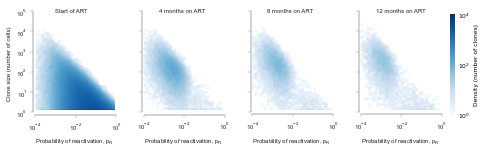

In [254]:
filename = 'Figures/constantLatent_firstyeardensityv2_order9.pdf'
plot_distribution_timepoints(df_clones_constantLatent_order9, [0,4,8,12], filename, 9)

<a class="anchor" id="constant_latent_only_powerlaw"></a>
## Power law figure

In [264]:
def power_law_plot(df_clones, timepoints_ART, filename, order=9):
    ##timepoints_ART[0] must always be zero
    
    # PLOT FIGURE
    bmap = sequential.Blues['max']    
    ## set up figure grid

    w     = DOUBLE_COLUMN #SLIDE_WIDTH
    goldh = w / 3.2
    fig   = plt.figure(figsize=(w, goldh))

    left_bd   = 0.06
    right_bd  = 0.95
    h_space   = 0.05
    box_h     = (right_bd - left_bd - 3*h_space)/4
    top_bd    = 0.92
    bottom_bd = 0.25
    v_space   = 0.10
    box_v     = (top_bd - bottom_bd - 1*v_space)/2

    box_left   = dict(left=left_bd + 0*box_h + 0*h_space, right=left_bd + 1*box_h + 0*h_space, top=top_bd, bottom=bottom_bd)
    box_middle = dict(left=left_bd + 1*box_h + 1*h_space, right=left_bd + 2*box_h + 1*h_space, top=top_bd, bottom=bottom_bd)
    box_right  = dict(left=left_bd + 2*box_h + 2*h_space, right=left_bd + 3*box_h + 2*h_space, top=top_bd, bottom=bottom_bd)
    box_far_right  = dict(left=left_bd + 3*box_h + 3*h_space, right=left_bd + 4*box_h + 3*h_space, top=top_bd, bottom=bottom_bd)


    lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
    dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

    gs_left = gridspec.GridSpec(1, 1, **box_left)
    ax_left = plt.subplot(gs_left[0,0])

    gs_middle = gridspec.GridSpec(1, 1, **box_middle)
    ax_middle = plt.subplot(gs_middle[0,0])

    gs_right = gridspec.GridSpec(1, 1, **box_right)
    ax_right = plt.subplot(gs_right[0,0])

    gs_far_right = gridspec.GridSpec(1, 1, **box_far_right)
    ax_far_right = plt.subplot(gs_far_right[0,0])
    

#     pprops = { 'xlim':        [-5, 0],
#                'xticks':      [-5, -2.5, 0],
#                'xticklabels': [r'$10^{-5}$', r'$10^{-2.5}$', r'$10^{0}$'],
#                'ylim':        [0, 5],
#                'yticks':      [0, 2.5, 5],
#                'yticklabels': [r'$10^{0}$', r'$10^{2.5}$', r'$10^{5}$'],
#                'logy':        False,
#                'ylabel':      r'clone size',
#                'xlabel':      r'$p_{R}$',
#                'axoffset':    0.1,
#                'theme':       'open' }
    
    slopes = []
    
    
    for i in range(4):
        if i ==0:
            ax_used = ax_left
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': [r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$'],
               'logy':        False,
               'ylabel':      r'Clone size (number of cells)',
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    0.1,
               'theme':       'open' }
            
        elif i==1:
            ax_used = ax_middle
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': ['', '', '', '', '', ''],
               'logy':        False,
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    0.0,
               'theme':       'open' }
        elif i ==2:
            ax_used = ax_right
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': ['', '', '', '', '', ''],
               'logy':        False,
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    -0.1,
               'theme':       'open' }
        elif i==3:
            ax_used = ax_far_right
            pprops = { 'xlim':        [-4, 0],
               'xticks':      [-4, -2, 0],
               'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
               'ylim':        [0, 5],
               'yticks':      [0, 1, 2, 3, 4, 5],
               'yticklabels': ['', '', '', '', '', ''],
               'logy':        False,
               'xlabel':      r'Probability of reactivation, $p_{R}$',
               'axoffset':    -0.2,
               'theme':       'open' }
            
            
        

#         xdat = [np.array([1,2])]
#         ydat = [np.array([-1,-2])]

#         mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)
        
        
        df_clones_temp = df_clones[df_clones['t']==60+timepoints_ART[i]]
        r = np.array(df_clones_temp['r'])
        L = np.array(df_clones_temp['L'])
        r = np.delete(r, np.where(L<1))
        L = np.delete(L, np.where(L<1))
        density = np.zeros((50, 50))
        for k in range(len(L)):
            i = -int((np.log10(r[k]))/0.1)  #0.1 is size of step in p_r
            j = int((np.log10(L[k]))/0.1) #0.1 is size of step in clone size
            density[i][j] += 1

        rx = np.arange(0.05,5,0.1)
        fy = np.arange(0.05,5,0.1)
        x = np.zeros(50*50)
        y = np.zeros(50*50)
        z = np.zeros(50*50)
        
        x_out = []
        y_out = []

        for i in range(50):
            x_out.append(- rx[i])
            y_largest = 0
            for j in range(50):
                if density[i][j] > 0:
                    if fy[j] > y_largest:
                        y_largest = fy[j]
            y_out.append(y_largest)
        
        for i in range(len(x_out)):
            if x_out[i] < -3.8:
                if y_out[i] < 3:
                    y_out[i] = 0
        
        x_out = list(np.array(x_out)[np.array(y_out)>0])
        y_out = list(np.array(y_out)[np.array(y_out)>0])
        
        model = LinearRegression().fit(np.array(x_out).reshape(-1, 1), np.array(y_out))
#         print(np.round(model.coef_ , 2))
        
        mp.plot(type='line',ax=ax_used, x=[x_out], y=[y_out], colors=[C_GAMMA], plotprops=lineprops, **pprops)
        
        xx = np.array(x_out)
        ax_used.plot(xx,model.predict(xx.reshape(-1,1)), '-', color = '#969696', alpha=0.5, label='Linear fit')
        
        
        
        
#         ax_used.plot(xx, yy, '.', alpha=0.5)
#         mp.plot(type='line',ax=ax_used, x=[x_out], y=[x_out], colors=[BKCOLOR], plotprops=dashprops, **pprops)
        
        slopes.append(np.round(model.coef_ , 2))
        
    ax_left.legend(loc=(0.5,0.6), prop={'size': 6}, frameon=False)
    ax_left.text(box_left['left']+0.07, box_left['top']-0.01, 'Start of ART', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_left.text(box_left['left']+0.08, box_left['top']-0.05, f'm = {slopes[0][0]}', transform=fig.transFigure, **DEF_LABELPROPS)
    if timepoints_ART[1] == 1:
        ax_middle.text(box_middle['left']+0.06, box_middle['top']-0.01, '1 month on ART', transform=fig.transFigure, **DEF_LABELPROPS)
        ax_middle.text(box_middle['left']+0.08, box_middle['top']-0.05, f'm = {slopes[1][0]}', transform=fig.transFigure, **DEF_LABELPROPS)
    else:
        ax_middle.text(box_middle['left']+0.06, box_middle['top']-0.01, str(timepoints_ART[1])+' months on ART', transform=fig.transFigure, **DEF_LABELPROPS)
        ax_middle.text(box_middle['left']+0.08, box_middle['top']-0.05, f'm = {slopes[1][0]}', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_right.text(box_right['left']+0.06, box_left['top']-0.01, str(timepoints_ART[2])+' months on ART', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_right.text(box_right['left']+0.08, box_left['top']-0.05, f'm = {slopes[2][0]}', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_far_right.text(box_far_right['left']+0.06, box_left['top']-0.01, str(timepoints_ART[3])+' months on ART', transform=fig.transFigure, **DEF_LABELPROPS)
    ax_far_right.text(box_far_right['left']+0.08, box_left['top']-0.05, f'm = {slopes[3][0]}', transform=fig.transFigure, **DEF_LABELPROPS)
    
    plt.savefig(filename , dpi = 1000, facecolor = fig.get_facecolor(), edgecolor=None, **FIGPROPS)
#     plt.close(fig)

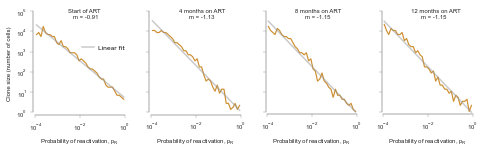

In [265]:
filename = 'Figures/constantLatent_firstyeardensityv2_order9_powerlaw.pdf'
power_law_plot(df_clones_constantLatent_order9, [0,4,8,12], filename, 9)

<a class="anchor" id="mutation_wave_only_figures"></a>
# Generating figures from the "mutation wave" simulation only
This section is to generate figures *exclusively* from the simulation where a constant number of new active and latent clones are being produced

In [266]:
df_sequences_mutationwave_order10  = pd.read_csv('OutputFiles/mutations_wave/Order10/sequences.csv')

<Figure size 240.945x219.041 with 0 Axes>

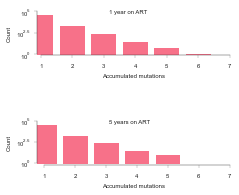

In [280]:
# PLOT FIGURE mutation wave order 10
df = df_sequences_mutationwave_order10

lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

pprops = { 'xlim':      [1, 7],
           'xticks':      [1, 2, 3, 4, 5, 6, 7],
           'xticklabels': [r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$', r'$7$'],
           'ylim':        [1e0, 1e5],
           'yticks':      [1e0, 10**2.5, 1e5],
           'yticklabels': [r'$10^{0}$', r'$10^{2.5}$',r'$10^{5}$'],
           'logy':        True,
           'ylabel':      'Count',
           'xlabel':      'Accumulated mutations',
           'axoffset':    0.1,
           'theme':       'open' }

## set up figure grid
    
    
w     = SINGLE_COLUMN #SLIDE_WIDTH
goldh = w / 1.1
fig   = plt.figure(figsize=(w, goldh))


# box_h   = 0.2
# box_dh  = 0.12
# box_top = 0.95

# box_left = dict(left=0.15, right=0.95, top=box_top - 0*box_h - 0*box_dh, bottom=box_top - 1*box_h - 0*box_dh)
# box_middle  = dict(left=0.15, right=0.95, top=box_top - 1*box_h - 1*box_dh, bottom=box_top - 2*box_h - 1*box_dh)
# box_right = dict(left=0.15, right=0.95, top=box_top - 2*box_h - 2*box_dh, bottom=box_top - 3*box_h - 2*box_dh)
    
    
    
w     = SINGLE_COLUMN #SLIDE_WIDTH
goldh = w / 1.1
fig   = plt.figure(figsize=(w, goldh))

left_bd   = 0.15
right_bd  = 0.95
h_space   = 0.05
top_bd    = 0.95
bottom_bd = 0.25
v_space   = 0.12
box_v     = 0.2



box_year1   = dict(left=left_bd, right=right_bd, top=top_bd, bottom=top_bd-box_v)
box_year5   = dict(left=left_bd, right=right_bd, top=bottom_bd + box_v, bottom=bottom_bd)

gs_year1 = gridspec.GridSpec(1, 1, **box_year1)
gs_year5 = gridspec.GridSpec(1, 1, **box_year5)

ax_year1 = plt.subplot(gs_year1[0,0])
ax_year5 = plt.subplot(gs_year5[0,0])


#First year

xdat = [np.array([1e3,1e4])]
ydat = [np.array([1e3,1e4])]

mp.plot(type='line',ax=ax_year1, x=xdat, y=ydat, colors=[C_DELTA], plotprops=lineprops, **pprops)

df_t = df.loc[df['t']==12]
Nmut = np.array(df_t['Nmut'])
x,t = np.unique(Nmut, return_counts = True)

ax_year1.bar(x, t, color=C_DELTA)


# Fifth year

xdat = [np.array([1e3,1e4])]
ydat = [np.array([1e3,1e4])]


mp.plot(type='line',ax=ax_year5, x=xdat, y=ydat, colors=[C_DELTA], plotprops=lineprops, **pprops)

df_t = df.loc[df['t']==60]
Nmut = np.array(df_t['Nmut'])
x,t = np.unique(Nmut, return_counts = True)

ax_year5.bar(x, t, color=C_DELTA)



# Titles 

ax_year1.text(box_year1['left']+0.3, box_year1['top']-0.01, '1 year on ART', transform=fig.transFigure, **DEF_LABELPROPS)
ax_year5.text(box_year5['left']+0.3, box_year5['top']-0.01, '5 years on ART', transform=fig.transFigure, **DEF_LABELPROPS)




# SAVE FIGURE

plt.savefig('Figures/MutationWaveOrder10.pdf' , dpi = 1000, facecolor = fig.get_facecolor(), edgecolor=None, **FIGPROPS)

<a class="anchor" id="early_ART"></a>
# Generating figures from the "Early ART" simulation only

In [282]:
df_clones_EarlyART     = pd.read_csv('OutputFiles/EarlyART/clones.csv')

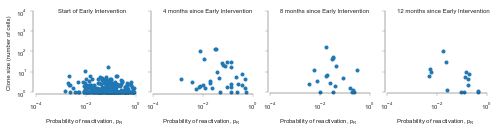

In [284]:
##timepoints
  
timepoints = [0, 4, 8, 12]    
order = 11
    
# PLOT FIGURE
bmap = sequential.Blues['max']    
## set up figure grid

w     = DOUBLE_COLUMN #SLIDE_WIDTH
goldh = w / 4
fig   = plt.figure(figsize=(w, goldh))

left_bd   = 0.06
right_bd  = 0.97
h_space   = 0.03
box_h     = (right_bd - left_bd - 2*h_space)/4.1
top_bd    = 0.92
bottom_bd = 0.25
v_space   = 0.10
box_v     = (top_bd - bottom_bd - 1*v_space)/2

box_left   = dict(left=left_bd + 0*box_h + 0*h_space, right=left_bd + 1*box_h + 0*h_space, top=top_bd, bottom=bottom_bd)
box_middle = dict(left=left_bd + 1*box_h + 1*h_space, right=left_bd + 2*box_h + 1*h_space, top=top_bd, bottom=bottom_bd)
box_right  = dict(left=left_bd + 2*box_h + 2*h_space, right=left_bd + 3*box_h + 2*h_space, top=top_bd, bottom=bottom_bd)
box_far_right  = dict(left=left_bd + 3*box_h + 3*h_space, right=left_bd + 4*box_h + 3*h_space, top=top_bd, bottom=bottom_bd)


lineprops = {'lw': 2*SIZELINE, 'ls': '-', 'alpha': 1 }
dashprops = {'lw': 2*SIZELINE, 'ls': ':', 'alpha': 0.5 }

gs_left = gridspec.GridSpec(1, 1, **box_left)
ax_left = plt.subplot(gs_left[0,0])

gs_middle = gridspec.GridSpec(1, 1, **box_middle)
ax_middle = plt.subplot(gs_middle[0,0])

gs_right = gridspec.GridSpec(1, 1, **box_right)
ax_right = plt.subplot(gs_right[0,0])

gs_far_right = gridspec.GridSpec(1, 1, **box_far_right)
ax_far_right = plt.subplot(gs_far_right[0,0])


# pprops = { 'xlim':        [-5, 0],
#            'xticks':      [-5, -2.5, 0],
#            'xticklabels': [r'$10^{-5}$', r'$10^{-2.5}$', r'$10^{0}$'],
#            'ylim':        [0, 5],
#            'yticks':      [0, 2.5, 5],
#            'yticklabels': [r'$10^{0}$', r'$10^{2.5}$', r'$10^{5}$'],
#            'logy':        False,
#            'ylabel':      r'clone size',
#            'xlabel':      r'$p_{R}$',
#            'axoffset':    0.1,
#            'theme':       'open' }

for i in range(4):
    if i ==0:
        ax_used = ax_left
        pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': [r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'],
           'logy':        False,
           'ylabel':      r'Clone size (number of cells)',
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    0.1,
           'theme':       'open' }
    elif i==1:
        ax_used = ax_middle
        pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': ['', '', '', '', ''],
           'logy':        False,
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    0.0,
           'theme':       'open' }
    elif i ==2:
        ax_used = ax_right
        pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': ['', '', '', '', ''],
           'logy':        False,
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    -0.1,
           'theme':       'open' }
    elif i==3:
        ax_used = ax_far_right
        pprops = { 'xlim':        [-4, 0],
           'xticks':      [-4, -2, 0],
           'xticklabels': [r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$'],
           'ylim':        [0, 4],
           'yticks':      [0, 1, 2, 3, 4],
           'yticklabels': ['', '', '', '', ''],
           'logy':        False,
           'xlabel':      r'Probability of reactivation, $p_{R}$',
           'axoffset':    -0.2,
           'theme':       'open' }

    xdat = [np.array([1,2])]
    ydat = [np.array([-1,-2])]

    mp.plot(type='line',ax=ax_used, x=xdat, y=ydat, colors=[BKCOLOR], plotprops=lineprops, **pprops)


    df_clones_temp = df_clones_EarlyART[df_clones_EarlyART['t']==timepoints[i]]
    r = np.array(df_clones_temp['r'])
    L = np.array(df_clones_temp['L'])
    r = np.delete(r, np.where(L<1))
    L = np.delete(L, np.where(L<1))
    
    ax_used.plot(np.log10(r),np.log10(L),'.')


ax_left.text(box_left['left']+0.05, box_left['top']-0.01, 'Start of Early Intervention', transform=fig.transFigure, **DEF_LABELPROPS) 
ax_middle.text(box_middle['left']+0.025, box_middle['top']-0.01, '4 months since Early Intervention', transform=fig.transFigure, **DEF_LABELPROPS)
ax_right.text(box_right['left']+0.025, box_left['top']-0.01, '8 months since Early Intervention', transform=fig.transFigure, **DEF_LABELPROPS)
ax_far_right.text(box_far_right['left']+0.025, box_left['top']-0.01, '12 months since Early Intervention', transform=fig.transFigure, **DEF_LABELPROPS)



# SAVE FIGURE

plt.savefig('Figures/earlyART.pdf' , dpi = 1000, facecolor = fig.get_facecolor(), edgecolor=None, **FIGPROPS)